In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
from pathlib import Path

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import torch #pytorch
import torch.nn as nn
from torch.autograd import Variable 

In [2]:
dataset = pd.read_excel("./datasets/historic-sales.xlsx")

In [3]:
dataset = dataset.fillna(0)

In [6]:
dataset.head()

,Unnamed: 0,TIME_DIM_KEY,SCRUB_STORE_NO,SALES_UNITS,unique_ID,DOY_STD,MIN_TEMPERATURE_AIR_2M_F,AVG_TEMPERATURE_AIR_2M_F,MAX_TEMPERATURE_AIR_2M_F,MIN_TEMPERATURE_WETBULB_2M_F,...,TOT_PRECIPITATION_IN,TOT_SNOWFALL_IN,TOT_SNOWDEPTH_IN,MIN_CLOUD_COVER_TOT_PCT,AVG_CLOUD_COVER_TOT_PCT,MAX_CLOUD_COVER_TOT_PCT,MIN_RADIATION_SOLAR_TOTAL_WPM2,AVG_RADIATION_SOLAR_TOTAL_WPM2,MAX_RADIATION_SOLAR_TOTAL_WPM2,TOT_RADIATION_SOLAR_TOTAL_WPM2
0,0,20160102,1,759,20160102-1,2,26.5,30.4,34.5,25.1,...,0.0,0.0,16.1,0,57,100,0,32.3,132.0,776.0
1,1,20160103,1,486,20160103-1,3,26.0,29.1,31.6,24.5,...,0.0,0.0,15.4,73,94,100,0,49.6,236.0,1190.0
2,2,20160104,1,326,20160104-1,4,8.3,19.2,25.7,7.9,...,0.0,0.0,15.5,11,50,94,0,93.2,415.0,2238.0
3,3,20160105,1,395,20160105-1,5,6.2,19.1,28.7,6.0,...,0.0,0.0,15.3,19,81,99,0,52.6,214.0,1262.0
4,4,20160106,1,478,20160106-1,6,24.7,29.6,35.7,23.7,...,0.0,0.0,15.2,0,63,100,0,80.3,383.0,1928.0


In [8]:
if not Path("./datasets/historic-sales.csv").is_file():
    dataset.iloc[:,1:].to_csv("./datasets/historic-sales.csv",index=False)

In [9]:
temp = pd.read_csv("./datasets/historic-sales.csv")
temp

,TIME_DIM_KEY,SCRUB_STORE_NO,SALES_UNITS,unique_ID,DOY_STD,MIN_TEMPERATURE_AIR_2M_F,AVG_TEMPERATURE_AIR_2M_F,MAX_TEMPERATURE_AIR_2M_F,MIN_TEMPERATURE_WETBULB_2M_F,AVG_TEMPERATURE_WETBULB_2M_F,...,TOT_PRECIPITATION_IN,TOT_SNOWFALL_IN,TOT_SNOWDEPTH_IN,MIN_CLOUD_COVER_TOT_PCT,AVG_CLOUD_COVER_TOT_PCT,MAX_CLOUD_COVER_TOT_PCT,MIN_RADIATION_SOLAR_TOTAL_WPM2,AVG_RADIATION_SOLAR_TOTAL_WPM2,MAX_RADIATION_SOLAR_TOTAL_WPM2,TOT_RADIATION_SOLAR_TOTAL_WPM2
0,20160102,1,759,20160102-1,2,26.5,30.4,34.5,25.1,28.7,...,0.00,0.0,16.1,0,57,100,0,32.3,132.0,776.0
1,20160103,1,486,20160103-1,3,26.0,29.1,31.6,24.5,27.2,...,0.00,0.0,15.4,73,94,100,0,49.6,236.0,1190.0
2,20160104,1,326,20160104-1,4,8.3,19.2,25.7,7.9,17.8,...,0.00,0.0,15.5,11,50,94,0,93.2,415.0,2238.0
3,20160105,1,395,20160105-1,5,6.2,19.1,28.7,6.0,18.0,...,0.00,0.0,15.3,19,81,99,0,52.6,214.0,1262.0
4,20160106,1,478,20160106-1,6,24.7,29.6,35.7,23.7,27.8,...,0.00,0.0,15.2,0,63,100,0,80.3,383.0,1928.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31316,20210829,20,100,20210829-20,241,64.9,71.4,79.6,62.9,68.3,...,0.00,0.0,0.0,52,93,100,0,108.2,512.6,2595.7
31317,20210904,20,100,20210904-20,247,53.8,64.4,76.0,53.0,59.6,...,0.00,0.0,0.0,0,40,100,0,254.9,850.3,6118.7
31318,20210905,20,12,20210905-20,248,60.0,66.1,70.1,58.5,64.6,...,0.08,0.0,0.0,26,88,100,0,59.2,396.1,1422.2
31319,20210906,20,120,20210906-20,249,60.1,70.8,79.4,58.0,64.7,...,0.00,0.0,0.0,0,36,100,0,234.9,843.0,5638.0


In [5]:
cols = list(dataset.columns)
l = len(cols)
for i in range(l):
    print(i, cols[i])

0 Unnamed: 0
1 TIME_DIM_KEY
2 SCRUB_STORE_NO
3 SALES_UNITS
4 unique_ID
5 DOY_STD
6 MIN_TEMPERATURE_AIR_2M_F
7 AVG_TEMPERATURE_AIR_2M_F
8 MAX_TEMPERATURE_AIR_2M_F
9 MIN_TEMPERATURE_WETBULB_2M_F
10 AVG_TEMPERATURE_WETBULB_2M_F
11 MAX_TEMPERATURE_WETBULB_2M_F
12 MIN_TEMPERATURE_DEWPOINT_2M_F
13 AVG_TEMPERATURE_DEWPOINT_2M_F
14 MAX_TEMPERATURE_DEWPOINT_2M_F
15 MIN_TEMPERATURE_FEELSLIKE_2M_F
16 AVG_TEMPERATURE_FEELSLIKE_2M_F
17 MAX_TEMPERATURE_FEELSLIKE_2M_F
18 MIN_TEMPERATURE_WINDCHILL_2M_F
19 AVG_TEMPERATURE_WINDCHILL_2M_F
20 MAX_TEMPERATURE_WINDCHILL_2M_F
21 MIN_TEMPERATURE_HEATINDEX_2M_F
22 AVG_TEMPERATURE_HEATINDEX_2M_F
23 MAX_TEMPERATURE_HEATINDEX_2M_F
24 MIN_HUMIDITY_RELATIVE_2M_PCT
25 AVG_HUMIDITY_RELATIVE_2M_PCT
26 MAX_HUMIDITY_RELATIVE_2M_PCT
27 MIN_HUMIDITY_SPECIFIC_2M_GPKG
28 AVG_HUMIDITY_SPECIFIC_2M_GPKG
29 MAX_HUMIDITY_SPECIFIC_2M_GPKG
30 MIN_PRESSURE_2M_MB
31 AVG_PRESSURE_2M_MB
32 MAX_PRESSURE_2M_MB
33 MIN_PRESSURE_TENDENCY_2M_MB
34 AVG_PRESSURE_TENDENCY_2M_MB
35 MAX_PRESSURE

# Negleting the geographic reference of the stores

In [33]:
# total data
independent_cols = (58,59)
dependent_cols = (3,4)
split = [0.6,0.2,0.1]

In [34]:
train_len = int(dataset.shape[0] * split[0])
test_len = int(dataset.shape[0] * split[1])

data = dataset.iloc[:train_len+test_len,:]
data.shape

(25056, 61)

In [35]:
X = data.iloc[:, independent_cols[0]:independent_cols[1]]
y = data.iloc[:, dependent_cols[0]:dependent_cols[1]] 

In [36]:
mm = MinMaxScaler()
ss = StandardScaler()

X_ss = ss.fit_transform(X)
y_mm = mm.fit_transform(y)

In [37]:
X_train = X_ss[:train_len+1, :]
X_test = X_ss[train_len+1:, :]

y_train = y_mm[:train_len+1, :]
y_test = y_mm[train_len+1:, :] 

print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape) 

Training Shape (18793, 1) (18793, 1)
Testing Shape (6263, 1) (6263, 1)


In [38]:
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test)) 

In [39]:
X_train_tensors_final = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_final = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1])) 

print("Training Shape", X_train_tensors_final.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_final.shape, y_test_tensors.shape) 

Training Shape torch.Size([18793, 1, 1]) torch.Size([18793, 1])
Testing Shape torch.Size([6263, 1, 1]) torch.Size([6263, 1])


In [40]:
class LSTM1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM1, self).__init__()
        self.num_classes = num_classes #number of classes
        self.num_layers = num_layers #number of layers
        self.input_size = input_size #input size
        self.hidden_size = hidden_size #hidden state
        self.seq_length = seq_length #sequence length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) #lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
        self.fc = nn.Linear(128, num_classes) #fully connected last layer

        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #hidden state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #internal state
        # Propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
        hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) #first Dense
        out = self.relu(out) #relu
        out = self.fc(out) #Final Output
        return out

In [43]:
num_epochs = 1000 #1000 epochs
learning_rate = 0.01 #0.001 lr

input_size = 1 #number of features
hidden_size = 200 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers

num_classes = 1 #number of output classes 

In [44]:
lstm1 = LSTM1(num_classes, input_size, hidden_size, num_layers, X_train_tensors_final.shape[1]) #our lstm class 
criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm1.parameters(), lr=learning_rate) 

In [45]:
for epoch in range(num_epochs):
    outputs = lstm1.forward(X_train_tensors_final) #forward pass
    optimizer.zero_grad() #caluclate the gradient, manually setting to 0

    # obtain the loss function
    loss = criterion(outputs, y_train_tensors)

    loss.backward() #calculates the loss of the loss function

    optimizer.step() #improve from loss, i.e backprop
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 

Epoch: 0, loss: 0.03006
Epoch: 100, loss: 0.00196
Epoch: 200, loss: 0.00195
Epoch: 300, loss: 0.00195
Epoch: 400, loss: 0.00195
Epoch: 500, loss: 0.00195
Epoch: 600, loss: 0.00195
Epoch: 700, loss: 0.00195
Epoch: 800, loss: 0.00195
Epoch: 900, loss: 0.00195


In [184]:
X_val = dataset.iloc[train_len+test_len:, independent_cols[0]:independent_cols[1]]
y_val = dataset.iloc[train_len+test_len:, dependent_cols[0]:dependent_cols[1]] 

df_X_ss = ss.transform(X_val) #old transformers
df_y_mm = mm.transform(y_val) #old transformers

df_X_ss = ss.transform(dataset.iloc[:, independent_cols[0]:independent_cols[1]]) #old transformers
df_y_mm = mm.transform(dataset.iloc[:, dependent_cols[0]:dependent_cols[1]]) #old transformers

df_X_ss = Variable(torch.Tensor(df_X_ss)) #converting to Tensors
df_y_mm = Variable(torch.Tensor(df_y_mm))
#reshaping the dataset
df_X_ss = torch.reshape(df_X_ss, (df_X_ss.shape[0], 1, df_X_ss.shape[1])) 

In [194]:
def smooth(y, box_pts=20):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

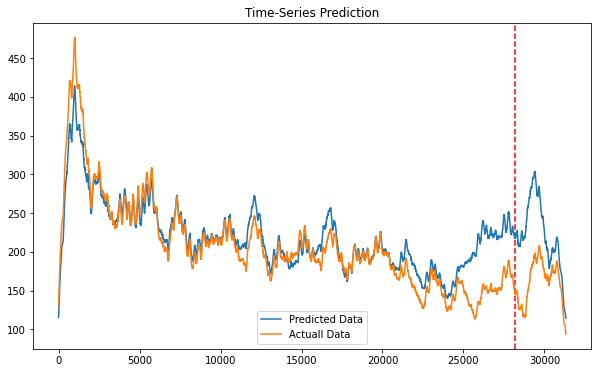

In [199]:
train_predict = lstm1(df_X_ss)#forward pass
data_predict = train_predict.data.numpy() #numpy conversion
dataY_plot = df_y_mm.data.numpy()

data_predict = mm.inverse_transform(data_predict) #reverse transformation
dataY_plot = mm.inverse_transform(dataY_plot)
plt.figure(figsize=(10,6)) #plotting
plt.axvline(x=train_len+test_len, c='r', linestyle='--') #size of the training set


plt.plot(smooth(data_predict[:,0],1000), label='Predicted Data') #predicted plot
plt.plot(smooth(dataY_plot[:,0],1000), label='Actuall Data') #actual plot
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

In [196]:
data_predict.shape

(31321, 1)

In [189]:
dataY_plot

array([[759.00006 ],
       [485.99997 ],
       [325.99997 ],
       ...,
       [ 11.999992],
       [120.00002 ],
       [120.00002 ]], dtype=float32)

# Analysis on particular store

In [19]:
store_no = 1
independent_cols = (58,59)
dependent_cols = (3,4)
split = [0.6,0.3,0.1]

In [20]:
train_len = int(dataset[dataset["SCRUB_STORE_NO"]==store_no].shape[0] * split[0])
test_len = int(dataset[dataset["SCRUB_STORE_NO"]==store_no].shape[0] * split[1])

data = dataset[dataset["SCRUB_STORE_NO"]==store_no].iloc[:train_len+test_len,:]
data.shape

(1471, 61)

In [21]:
X = data.iloc[:, independent_cols[0]:independent_cols[1]]
y = data.iloc[:, dependent_cols[0]:dependent_cols[1]] 

In [22]:
mm = MinMaxScaler()
ss = StandardScaler()

X_ss = ss.fit_transform(X)
y_mm = mm.fit_transform(y)

In [23]:
X_train = X_ss[:train_len+1, :]
X_test = X_ss[train_len+1:, :]

y_train = y_mm[:train_len+1, :]
y_test = y_mm[train_len+1:, :] 

print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape) 

Training Shape (982, 1) (982, 1)
Testing Shape (489, 1) (489, 1)


In [24]:
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test)) 

In [25]:
X_train_tensors_final = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_final = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1])) 

print("Training Shape", X_train_tensors_final.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_final.shape, y_test_tensors.shape) 

Training Shape torch.Size([982, 1, 1]) torch.Size([982, 1])
Testing Shape torch.Size([489, 1, 1]) torch.Size([489, 1])


In [26]:
class LSTM1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM1, self).__init__()
        self.num_classes = num_classes #number of classes
        self.num_layers = num_layers #number of layers
        self.input_size = input_size #input size
        self.hidden_size = hidden_size #hidden state
        self.seq_length = seq_length #sequence length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) #lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
        self.fc = nn.Linear(128, num_classes) #fully connected last layer

        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #hidden state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #internal state
        # Propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
        hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) #first Dense
        out = self.relu(out) #relu
        out = self.fc(out) #Final Output
        return out

In [27]:
num_epochs = 1000 #1000 epochs
learning_rate = 0.01 #0.001 lr

input_size = X_train.shape[1] #number of features
hidden_size = 200 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers

num_classes = 1 #number of output classes 

In [28]:
lstm1 = LSTM1(num_classes, input_size, hidden_size, num_layers, X_train_tensors_final.shape[1]) #our lstm class 
criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm1.parameters(), lr=learning_rate) 

In [29]:
for epoch in range(num_epochs):
    outputs = lstm1.forward(X_train_tensors_final) #forward pass
    optimizer.zero_grad() #caluclate the gradient, manually setting to 0

    # obtain the loss function
    loss = criterion(outputs, y_train_tensors)

    loss.backward() #calculates the loss of the loss function

    optimizer.step() #improve from loss, i.e backprop
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 

Epoch: 0, loss: 0.04360
Epoch: 100, loss: 0.00907
Epoch: 200, loss: 0.00902
Epoch: 300, loss: 0.00901
Epoch: 400, loss: 0.00901
Epoch: 500, loss: 0.00900
Epoch: 600, loss: 0.00900
Epoch: 700, loss: 0.00899
Epoch: 800, loss: 0.00899
Epoch: 900, loss: 0.00900


In [30]:
X_val = dataset[dataset["SCRUB_STORE_NO"]==store_no].iloc[train_len+test_len:, independent_cols[0]:independent_cols[1]]
y_val = dataset[dataset["SCRUB_STORE_NO"]==store_no].iloc[train_len+test_len:, dependent_cols[0]:dependent_cols[1]] 

df_X_ss = ss.transform(X_val) #old transformers
df_y_mm = mm.transform(y_val) #old transformers

df_X_ss = ss.transform(dataset[dataset["SCRUB_STORE_NO"]==store_no].iloc[:, independent_cols[0]:independent_cols[1]]) #old transformers
df_y_mm = mm.transform(dataset[dataset["SCRUB_STORE_NO"]==store_no].iloc[:, dependent_cols[0]:dependent_cols[1]]) #old transformers

df_X_ss = Variable(torch.Tensor(df_X_ss)) #converting to Tensors
df_y_mm = Variable(torch.Tensor(df_y_mm))
#reshaping the dataset
df_X_ss = torch.reshape(df_X_ss, (df_X_ss.shape[0], 1, df_X_ss.shape[1])) 

In [31]:
def smooth(y, box_pts=20):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

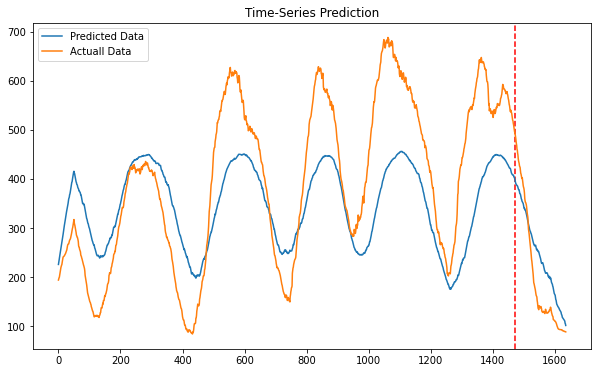

In [32]:
train_predict = lstm1(df_X_ss)#forward pass
data_predict = train_predict.data.numpy() #numpy conversion
dataY_plot = df_y_mm.data.numpy()

data_predict = mm.inverse_transform(data_predict) #reverse transformation
dataY_plot = mm.inverse_transform(dataY_plot)
plt.figure(figsize=(10,6)) #plotting
plt.axvline(x=train_len+test_len, c='r', linestyle='--') #size of the training set


plt.plot(smooth(data_predict[:,0],100), label='Predicted Data') #predicted plot
plt.plot(smooth(dataY_plot[:,0],100), label='Actuall Data') #actual plot
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 

In [47]:
dataset[["SCRUB_STORE_NO","AVG_RADIATION_SOLAR_TOTAL_WPM2"]]

,SCRUB_STORE_NO,AVG_RADIATION_SOLAR_TOTAL_WPM2
0,1,32.3
1,1,49.6
2,1,93.2
3,1,52.6
4,1,80.3
...,...,...
31316,20,108.2
31317,20,254.9
31318,20,59.2
31319,20,234.9


# Specific Columns

In [49]:
cols = list(dataset.columns)

In [50]:
cols

['Unnamed: 0',
 'TIME_DIM_KEY',
 'SCRUB_STORE_NO',
 'SALES_UNITS',
 'unique_ID',
 'DOY_STD',
 'MIN_TEMPERATURE_AIR_2M_F',
 'AVG_TEMPERATURE_AIR_2M_F',
 'MAX_TEMPERATURE_AIR_2M_F',
 'MIN_TEMPERATURE_WETBULB_2M_F',
 'AVG_TEMPERATURE_WETBULB_2M_F',
 'MAX_TEMPERATURE_WETBULB_2M_F',
 'MIN_TEMPERATURE_DEWPOINT_2M_F',
 'AVG_TEMPERATURE_DEWPOINT_2M_F',
 'MAX_TEMPERATURE_DEWPOINT_2M_F',
 'MIN_TEMPERATURE_FEELSLIKE_2M_F',
 'AVG_TEMPERATURE_FEELSLIKE_2M_F',
 'MAX_TEMPERATURE_FEELSLIKE_2M_F',
 'MIN_TEMPERATURE_WINDCHILL_2M_F',
 'AVG_TEMPERATURE_WINDCHILL_2M_F',
 'MAX_TEMPERATURE_WINDCHILL_2M_F',
 'MIN_TEMPERATURE_HEATINDEX_2M_F',
 'AVG_TEMPERATURE_HEATINDEX_2M_F',
 'MAX_TEMPERATURE_HEATINDEX_2M_F',
 'MIN_HUMIDITY_RELATIVE_2M_PCT',
 'AVG_HUMIDITY_RELATIVE_2M_PCT',
 'MAX_HUMIDITY_RELATIVE_2M_PCT',
 'MIN_HUMIDITY_SPECIFIC_2M_GPKG',
 'AVG_HUMIDITY_SPECIFIC_2M_GPKG',
 'MAX_HUMIDITY_SPECIFIC_2M_GPKG',
 'MIN_PRESSURE_2M_MB',
 'AVG_PRESSURE_2M_MB',
 'MAX_PRESSURE_2M_MB',
 'MIN_PRESSURE_TENDENCY_2M_MB',
 '

In [56]:
cols = ['SCRUB_STORE_NO',
        'SALES_UNITS',
        "AVG_TEMPERATURE_AIR_2M_F",
        "AVG_TEMPERATURE_WETBULB_2M_F",
        "AVG_TEMPERATURE_DEWPOINT_2M_F",
        "AVG_TEMPERATURE_FEELSLIKE_2M_F",
        "AVG_TEMPERATURE_WINDCHILL_2M_F",
        "AVG_TEMPERATURE_HEATINDEX_2M_F",
        "AVG_RADIATION_SOLAR_TOTAL_WPM2"
       ]

In [59]:
# total data
independent_cols = cols
dependent_cols = (0,1)
split = [0.6,0.2,0.1]

In [60]:
train_len = int(dataset[independent_cols].shape[0] * split[0])
test_len = int(dataset[independent_cols].shape[0] * split[1])

data = dataset[independent_cols].iloc[:train_len+test_len,:]
data.shape

(25056, 9)

In [62]:
X = data.iloc[:, 2:]
y = data.iloc[:, 1:2] 

In [63]:
mm = MinMaxScaler()
ss = StandardScaler()

X_ss = ss.fit_transform(X)
y_mm = mm.fit_transform(y)

In [67]:
X_train = X_ss[:train_len+1, :]
X_test = X_ss[train_len+1:, :]

y_train = y_mm[:train_len+1, :]
y_test = y_mm[train_len+1:, :] 

print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape) 

Training Shape (18793, 7) (18793, 1)
Testing Shape (6263, 7) (6263, 1)


In [68]:
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test)) 

In [69]:
X_train_tensors_final = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_final = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1])) 

print("Training Shape", X_train_tensors_final.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_final.shape, y_test_tensors.shape) 

Training Shape torch.Size([18793, 1, 7]) torch.Size([18793, 1])
Testing Shape torch.Size([6263, 1, 7]) torch.Size([6263, 1])


In [70]:
class LSTM1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM1, self).__init__()
        self.num_classes = num_classes #number of classes
        self.num_layers = num_layers #number of layers
        self.input_size = input_size #input size
        self.hidden_size = hidden_size #hidden state
        self.seq_length = seq_length #sequence length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) #lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
        self.fc = nn.Linear(128, num_classes) #fully connected last layer

        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #hidden state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #internal state
        # Propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
        hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) #first Dense
        out = self.relu(out) #relu
        out = self.fc(out) #Final Output
        return out

In [74]:
num_epochs = 1000 #1000 epochs
learning_rate = 0.01 #0.001 lr

input_size = X_train.shape[1] #number of features
hidden_size = 200 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers

num_classes = 1 #number of output classes 

In [75]:
lstm1 = LSTM1(num_classes, input_size, hidden_size, num_layers, X_train_tensors_final.shape[1]) #our lstm class 
criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm1.parameters(), lr=learning_rate) 

In [76]:
for epoch in range(num_epochs):
    outputs = lstm1.forward(X_train_tensors_final) #forward pass
    optimizer.zero_grad() #caluclate the gradient, manually setting to 0

    # obtain the loss function
    loss = criterion(outputs, y_train_tensors)

    loss.backward() #calculates the loss of the loss function

    optimizer.step() #improve from loss, i.e backprop
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 

Epoch: 0, loss: 0.00588
Epoch: 100, loss: 0.00180
Epoch: 200, loss: 0.00178
Epoch: 300, loss: 0.00176
Epoch: 400, loss: 0.00174
Epoch: 500, loss: 0.00173
Epoch: 600, loss: 0.00172
Epoch: 700, loss: 0.00170
Epoch: 800, loss: 0.00169
Epoch: 900, loss: 0.00169


In [84]:


df_X_ss = ss.transform(dataset[independent_cols].iloc[:, 2:]) #old transformers
df_y_mm = mm.transform(dataset[independent_cols].iloc[:, 1:2]) #old transformers

df_X_ss = Variable(torch.Tensor(df_X_ss)) #converting to Tensors
df_y_mm = Variable(torch.Tensor(df_y_mm))
#reshaping the dataset
df_X_ss = torch.reshape(df_X_ss, (df_X_ss.shape[0], 1, df_X_ss.shape[1])) 

In [85]:
def smooth(y, box_pts=20):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

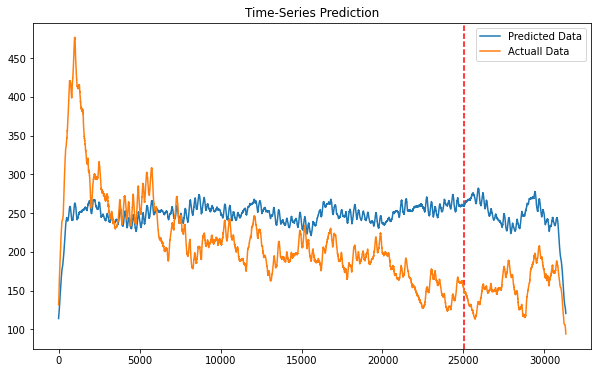

In [86]:
train_predict = lstm1(df_X_ss)#forward pass
data_predict = train_predict.data.numpy() #numpy conversion
dataY_plot = df_y_mm.data.numpy()

data_predict = mm.inverse_transform(data_predict) #reverse transformation
dataY_plot = mm.inverse_transform(dataY_plot)
plt.figure(figsize=(10,6)) #plotting
plt.axvline(x=train_len+test_len, c='r', linestyle='--') #size of the training set


plt.plot(smooth(data_predict[:,0],1000), label='Predicted Data') #predicted plot
plt.plot(smooth(dataY_plot[:,0],1000), label='Actuall Data') #actual plot
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 